## 布里尔分数Brier Score

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss

In [2]:
digits = load_digits()  # 手写数据集
X, y = digits.data, digits.target

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

In [4]:
gnb = GaussianNB().fit(Xtrain, Ytrain)
# 查看分数
acc_score = gnb.score(Xtest, Ytest)  # 返回预测的精确性 accuracy
# 查看预测结果
Y_pred = gnb.predict(Xtest)
# 查看预测的概率结果
prob = gnb.predict_proba(Xtest)

In [5]:
prob.shape

(540, 10)

In [6]:
np.unique(Ytest)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# 注意，第一个参数是真实标签，第二个参数是预测出的概率值
# 在二分类情况下，接口predict_proba会返回两列，但SVC的接口decision_function却只会返回一列
# 要随时注意，使用了怎样的概率分类器，以辨别查找置信度的接口，以及这些接口的结构
brier_score_loss((Ytest==1).astype(int), prob[:, 1], pos_label=1)
# 我们的pos_label与prob中的索引一致，就可以查看这个类别下的布里尔分数是多少

0.032619662406118764

In [8]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

In [9]:
np.unique(Ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
Xtrain.shape

(1257, 64)

In [11]:
logi = LR(C=1., solver='lbfgs', max_iter=3000,
          multi_class="auto").fit(Xtrain, Ytrain)
svc = SVC(kernel="linear", gamma=1).fit(Xtrain, Ytrain)

In [12]:
brier_score_loss((Ytest == 1).astype(
    int), logi.predict_proba(Xtest)[:, 1], pos_label=1)

0.01142642480567435

In [13]:
svc.decision_function(Xtest)

array([[ 6.24837122,  3.71700301,  2.71927921, ..., -0.31216676,
         8.31590244,  0.69032425],
       [-0.3087187 ,  9.31441373,  6.27530649, ...,  0.69093621,
         7.28364791,  3.83955107],
       [ 0.6906499 ,  2.71878697,  7.27763251, ...,  6.2744652 ,
         8.30835126,  5.28750364],
       ...,
       [ 4.78686312,  5.13417125, -0.3052943 , ...,  8.29648495,
         6.29518651,  1.69695548],
       [ 2.74874208,  2.6867217 ,  6.28769759, ...,  2.89864232,
         8.31336146,  7.27763454],
       [-0.31162689,  9.31682254,  4.89495994, ...,  5.84334803,
         7.30473457,  1.70688667]])

In [14]:
# 由于SVC的置信度并不是概率，为了可比性，我们需要将SVC的置信度“距离”归一化，压缩到[0,1]之间
svc_prob = (svc.decision_function(Xtest) - svc.decision_function(Xtest).min()) / \
    (svc.decision_function(Xtest).max() - svc.decision_function(Xtest).min())

In [15]:
brier_score_loss((Ytest == 1).astype(int), svc_prob[:, 1], pos_label=1)

0.24286480465579566

### 将每个分类器每个标签类别下的布里尔分数可视化

In [16]:
import pandas as pd
name = ["Bayes","Logistic","SVC"]
color = ["red","black","orange"]
df = pd.DataFrame(index=range(10),columns=name)
df

,Bayes,Logistic,SVC
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [17]:
for i in range(10):
    df.loc[i, name[0]] = brier_score_loss((Ytest == i).astype(
        int), prob[:, i], pos_label=i)  # 标签为i的时候的贝叶斯下的布里尔分数
    df.loc[i, name[1]] = brier_score_loss((Ytest == i).astype(
        int), logi.predict_proba(Xtest)[:, i], pos_label=i)  # 标签为i的时候逻辑回归下的布里尔分数
    df.loc[i, name[2]] = brier_score_loss((Ytest == i).astype(
        int), svc_prob[:, i], pos_label=i)  # SVC下的布里尔分数

In [18]:
df

,Bayes,Logistic,SVC
0,0.996244,0.999479,0.681634
1,0.0326197,0.0114264,0.242865
2,0.0733327,0.095298,0.251131
3,0.0806967,0.0932706,0.450271
4,0.0751393,0.0849752,0.252574
5,0.110865,0.113094,0.352765
6,0.0959412,0.0948883,0.276426
7,0.128007,0.0964966,0.28853
8,0.158683,0.104213,0.640142
9,0.0789063,0.0978492,0.396565


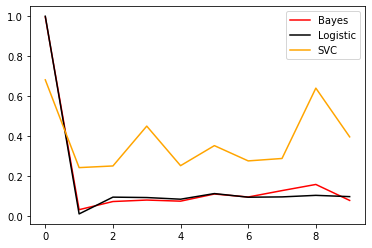

In [19]:
for i in range(df.shape[1]):
    plt.plot(range(10), df.iloc[:, i], c=color[i], label=name[i])
plt.legend()
plt.show()

## 对数似然函数Log Loss

In [20]:
from sklearn.metrics import log_loss

In [21]:
log_loss(Ytest, prob)

2.4725653911460683

In [24]:
prob.shape

(540, 10)

In [25]:
log_loss(Ytest, logi.predict_proba(Xtest))

0.12746354663758203

In [28]:
log_loss(Ytest, svc_prob)

1.6074987533411256

## 可靠性曲线Reliability Curve

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [30]:
X, y = mc(n_samples=100000, n_features=20  # 总共20个特征
          , n_classes=2  # 标签为2分类
          , n_informative=2  # 其中两个代表较多信息
          , n_redundant=10  # 10个都是冗余特征
          , random_state=42)

In [31]:
X.shape

(100000, 20)

In [32]:
np.unique(y)

array([0, 1])

In [33]:
# 样本量足够大，因此使用1%的样本作为训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.99  # 训练集会很小，测试集会很大
                                                , random_state=42)

In [34]:
Xtrain.shape

(1000, 20)

In [35]:
Xtest.shape

(99000, 20)

In [36]:
np.unique(Ytrain)

array([0, 1])

In [37]:
gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:, 1]  # 我们的预测概率 - 横坐标
clf_score = gnb.score(Xtest, Ytest)
#Ytest - 我们的真实标签 - 横坐标

In [41]:
gnb.predict_proba(Xtest).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
# 在我们的横纵坐标上，概率是由顺序的（由小到大），为了让图形规整一些，我们要先对预测概率和真实标签按照预测概率进行一个排序，这一点我们通过DataFrame来实现

df = pd.DataFrame({"ytrue": Ytest[:500], "probability": prob_pos[:500]})
# 利用字典来创建DataFrame({"列的名称":[列的值]})
df

,ytrue,probability
0,1,9.999997e-01
1,0,9.999964e-01
2,1,1.000000e+00
3,1,9.886612e-01
4,0,8.441773e-18
...,...,...
495,0,9.224911e-04
496,1,9.931903e-01
497,0,5.670253e-06
498,0,8.248345e-08


In [43]:
df = df.sort_values(by="probability")
df.index = range(df.shape[0])
df

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17
...,...,...
495,1,1.000000e+00
496,1,1.000000e+00
497,1,1.000000e+00
498,1,1.000000e+00


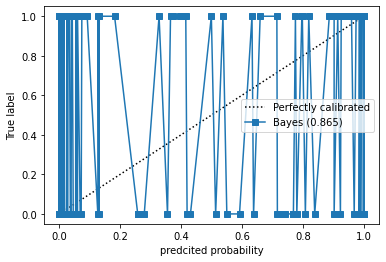

In [44]:
# 紧接着我们就可以画图了
fig = plt.figure()  # 画布
ax1 = plt.subplot()  # 建立一个子图
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")  # 得做一条对角线来对比呀
ax1.plot(df["probability"], df["ytrue"], "s-",
         label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

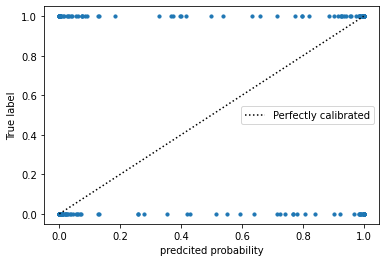

In [45]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.scatter(df["probability"], df["ytrue"], s=10)
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

In [46]:
from sklearn.calibration import calibration_curve

In [47]:
# 从类calibiration_curve中获取横坐标和纵坐标
trueproba, predproba = calibration_curve(Ytest, prob_pos, n_bins=10  # 输入希望分箱的个数
                                         )

In [48]:
trueproba.shape

(10,)

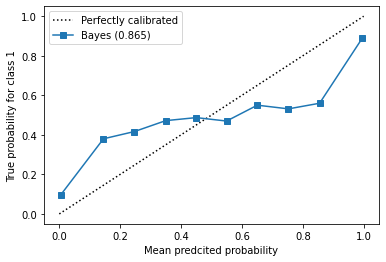

In [49]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

### 不同的n_bins取值下曲线如何改变？

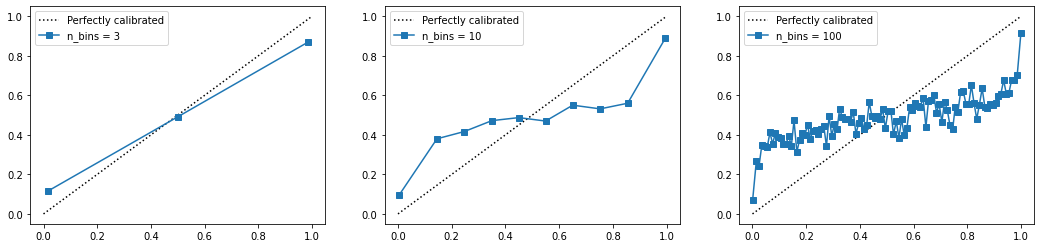

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for ind, i in enumerate([3, 10, 100]):
    ax = axes[ind]
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos, n_bins=i)
    ax.plot(predproba, trueproba, "s-", label="n_bins = {}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

### [建立循环，绘制多个模型的概率校准曲线](https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py)

In [51]:
name = ["GaussianBayes", "Logistic", "SVC"]

gnb = GaussianNB()
logi = LR(C=1., solver='lbfgs', max_iter=3000, multi_class="auto")
svc = SVC(kernel="linear", gamma=1)  # 置信度

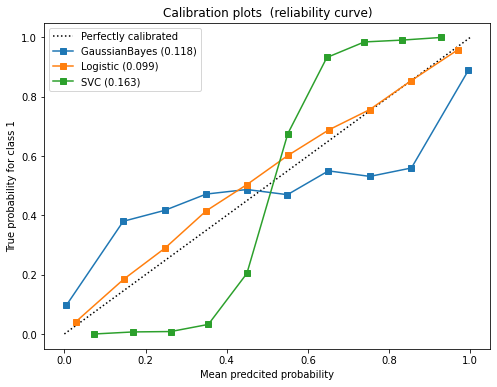

In [52]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name_ in zip([gnb, logi, svc], name):
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    # hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / \
            (prob_pos.max() - prob_pos.min())
    # 返回布里尔分数
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueproba, predproba = calibration_curve(Ytest, prob_pos, n_bins=10)
    ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)" %
             (name_, clf_score))

ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots  (reliability curve)')
plt.show()

## 预测概率的直方图

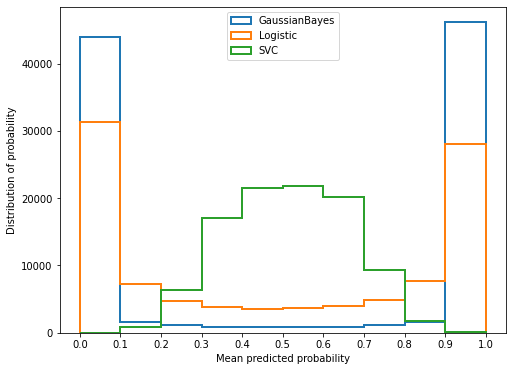

In [53]:
fig, ax2 = plt.subplots(figsize=(8, 6))

for clf, name_ in zip([gnb, logi, svc], name):
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    # hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / \
            (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos  # 预测概率
             , bins=10, label=name_, histtype="step"  # 设置直方图为透明
             , lw=2  # 设置直方图每个柱子描边的粗细
             )

ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax2.legend(loc=9)
plt.show()

## [校准可靠性曲线](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py)

In [56]:
def plot_calib(models, name, Xtrain, Xtest, Ytrain, Ytest, n_bins=10):

    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    for clf, name_ in zip(models, name):
        clf.fit(Xtrain, Ytrain)
        y_pred = clf.predict(Xtest)
        # hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / \
                (prob_pos.max() - prob_pos.min())
        # 返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(
            Ytest, prob_pos, n_bins=n_bins)
        ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)" %
                 (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins,
                 label=name_, histtype="step", lw=2)

    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

In [57]:
from sklearn.calibration import CalibratedClassifierCV

In [58]:
name = ["GaussianBayes", "Logistic", "Bayes+isotonic", "Bayes+sigmoid"]

gnb = GaussianNB()

models = [gnb, LR(C=1., solver='lbfgs', max_iter=3000, multi_class="auto"),
          # 定义两种校准方式
          CalibratedClassifierCV(gnb, cv=2, method='isotonic'),
          CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

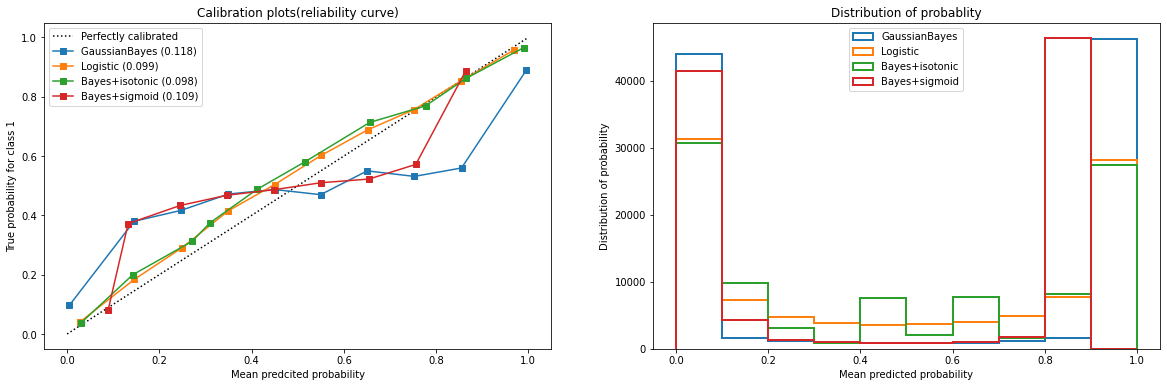

In [59]:
plot_calib(models, name, Xtrain, Xtest, Ytrain, Ytest)

### 基于校准结果查看精确性的变化

In [60]:
gnb = GaussianNB().fit(Xtrain, Ytrain)
gnb.score(Xtest, Ytest)

0.8650606060606061

In [61]:
brier_score_loss(Ytest, gnb.predict_proba(Xtest)[:, 1], pos_label=1)

0.11760826355000836

In [62]:
gnbisotonic = CalibratedClassifierCV(
    gnb, cv=2, method='isotonic').fit(Xtrain, Ytrain)
gnbisotonic.score(Xtest, Ytest)

0.8626767676767677

In [63]:
brier_score_loss(Ytest, gnbisotonic.predict_proba(Xtest)[:, 1], pos_label=1)

0.09833190251353853

### 对于SVC，哪种校准更有效

In [64]:
name_svc = ["SVC", "Logistic", "SVC+isotonic", "SVC+sigmoid"]

svc = SVC(kernel="linear", gamma=1)

models_svc = [svc, LR(C=1., solver='lbfgs', max_iter=3000, multi_class="auto"),
              # 依然定义两种校准方式
              CalibratedClassifierCV(svc, cv=2, method='isotonic'),
              CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

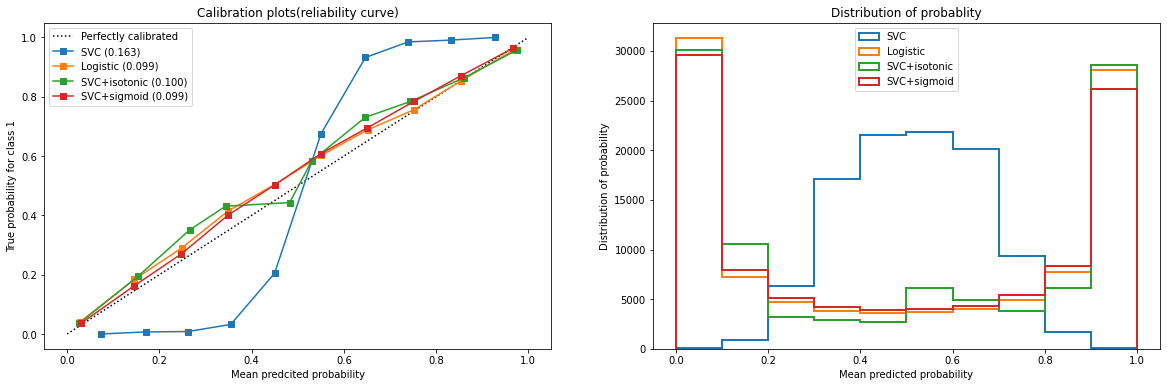

In [65]:
plot_calib(models_svc, name_svc, Xtrain, Xtest, Ytrain, Ytest)

In [66]:
name_svc = ["SVC", "SVC+isotonic", "SVC+sigmoid"]

svc = SVC(kernel="linear", gamma=1)

models_svc = [svc, CalibratedClassifierCV(
    svc, cv=2, method='isotonic'), CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

for clf, name in zip(models_svc, name_svc):
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / \
            (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest, Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1630
	Accuracy:0.8633
SVC+isotonic:
	Brier:0.0999
	Accuracy:0.8639
SVC+sigmoid:
	Brier:0.0987
	Accuracy:0.8634
